Import of necessary libraries

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.linalg import eigh
from sklearn.datasets  import load_digits

We now load MNIST dataset. MNIST dataset consists of 1797 images of digits from 0 to 9. Each digit is of 8 by 8 pixels.

In [27]:

mnist = load_digits()
data = mnist['images']
data.shape

(1797, 8, 8)

 Let's now take a image and plot it.

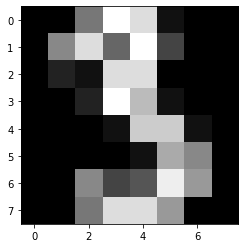

In [28]:
plt.imshow(data[3], cmap="gray")
plt.show()

We now reshape dataset of shape (1797,8,8) into (1797,64). Doing so we reshape each image of shape 8*8 into vector of 64 numbers. Now we can take our dataset as matrix of shape (1797,64).

In [29]:
data = data.reshape(data.shape[0], -1)
data.shape

(1797, 64)

We normalize our data and calculate covariance matrix in order to calculate eign values and eign vectors.

In [30]:
mean_vec = np.mean(data, axis=0)
data_norm = data - mean_vec
covariance_matrix = (data_norm).T.dot((data_norm)) / (data_norm.shape[0])

We will now calculate eign values and eign vectors using eigh method from scipy library

In [31]:
eigen_vals, eigen_vects = eigh(covariance_matrix)

We will sort eigen values in decreasing order and sort eign vectors according to eigen values.

In [32]:
idx=eigen_vals.argsort()[::-1]
eigen_vals=eigen_vals[idx]

In [33]:
eigen_vects = eigen_vects[:,idx]

As two dimensional data is easy to visualize, let's take `num_of_component` as 2 

In [34]:
num_of_component = 2

We now choose two greatest eigen values from sorted eigen values. 

In [35]:
eigen_values = eigen_vals[:num_of_component]

Similarly, we choose two eigen vectors from sorted list of them.

In [36]:
eigen_vectors = eigen_vects[:,:num_of_component]

We can now perform dimensionality reduction by multiplying our data with selected two eigen_vectors.

In [37]:
result = np.dot(data,eigen_vectors)

We now turn our result into data frame.

In [38]:
df = pd.DataFrame(data = result, columns = ("1st principal","2nd principal"))

We will also add labels of each image into dataframe.

In [39]:
target = np.array(mnist['target'])

In [40]:
df['target'] = target

Let's now visualize our dataset in 2D plot. Each digit from 0-9 is coloured different. Thus data visualization is one main use of PCA.

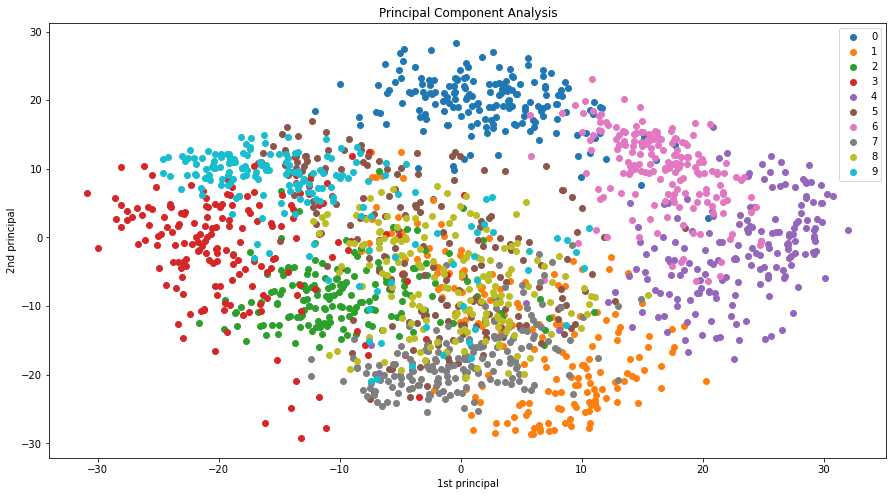

In [41]:
plt.figure(figsize=(15,8))
for i, j in enumerate(np.unique(target)): 
    plt.scatter(df['1st principal'][target == j], df['2nd principal'][target == j], 
                 label = j) 
plt.title('Principal Component Analysis')  
plt.xlabel('1st principal')
plt.ylabel('2nd principal')
plt.legend()  
plt.show() 

For choosing features to train the machine learning model, we might want to select certain number of principal components that can effectively represent our dataset. We plot variance explained by each component to select the number of principal components.

In [42]:
explained_variance = [np.abs(i)/np.sum(eigen_vals) for i in eigen_vals]

In [43]:
total_variance = np.cumsum(explained_variance)

<function matplotlib.pyplot.show(close=None, block=None)>

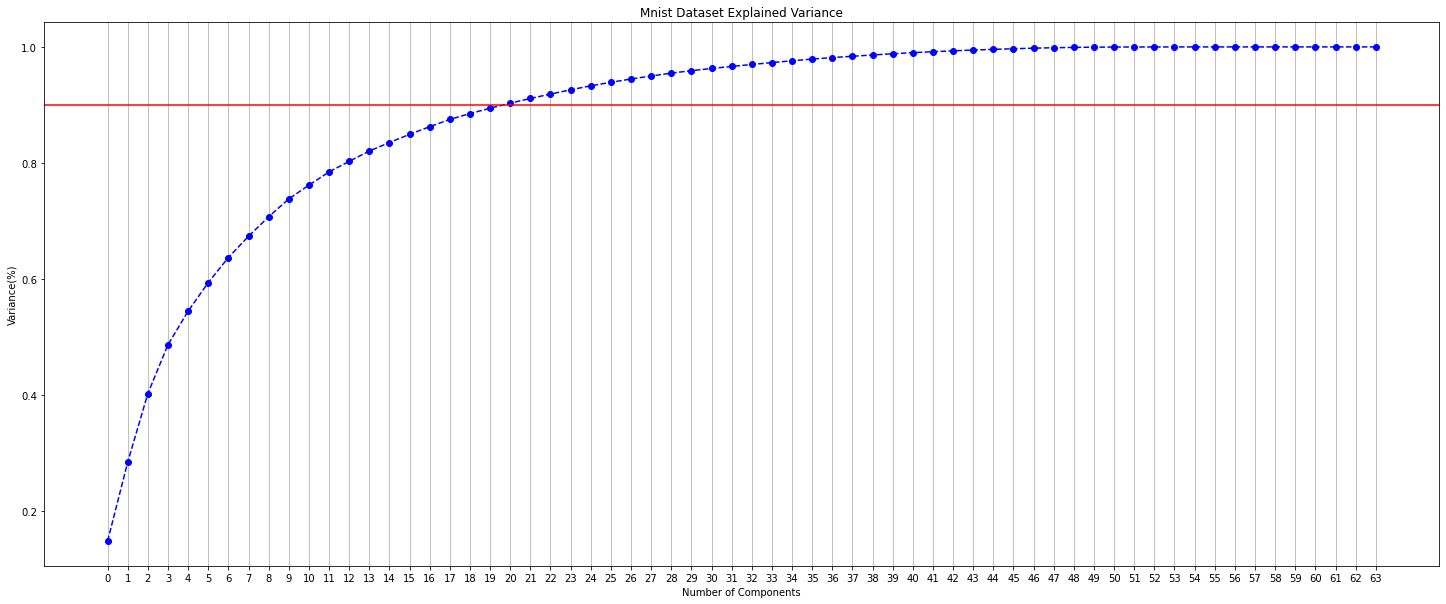

In [44]:
plt.figure(figsize=(25,10))
plt.plot(total_variance,marker='o',linestyle='--',color='b')
plt.xticks(np.arange(0,64,step=1))
plt.xlabel('Number of Components')
plt.ylabel('Variance(%)')
plt.title('Mnist Dataset Explained Variance')
plt.axhline(y=0.9,color = 'r',linestyle='-')
plt.grid(axis='x')
plt.show

From the plot, if we take 20 features it can represent our dataset with 90% accuracy. If we take 40 features out of 64, it can represent whole our dataset with almost 99% accuracy. Thus, another use of PCA is feature selection.